# import data

In [1]:
from WindPy import *

#Wind API 使用W账户密码登录
w.start() 

#return True and then can go to next operation.
w.isconnected()

import pandas as pd

22.8.14.52436
Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2021 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


In [2]:
# w.wsi("123046.SZ,300587.SZ,113642.SH,603185.SH,110061.SH,600674.SH,128081.SZ,002203.SZ,113016.SH,601127.SH,128017.SZ,002597.SZ",  "close",  "2022-09-06 09:00:00",  "2022-09-09 16:28:08",  "")

In [3]:
cbond_list = ['123046.SZ','300587.SZ',
'113642.SH','603185.SH',
'110061.SH','600674.SH',
'128081.SZ','002203.SZ',
'113016.SH','601127.SH',
'128017.SZ','002597.SZ',
'113537.SH','603348.SH',
'123027.SZ','300487.SZ',
'113534.SH','603876.SH',
'113025.SH','601677.SH',
'123031.SZ','300655.SZ',
'128029.SZ','002078.SZ']

# ###############################################################
# before_trade_date = '20220908'#监测当日前一个交易日
# present_date = '20220909' #监测当日
# next_trade_date = '20220910' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220909'#监测当日前一个交易日
# present_date = '20220913' #监测当日
# next_trade_date = '20220914' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220913'#监测当日前一个交易日
# present_date = '20220914' #监测当日
# next_trade_date = '20220915' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220914'#监测当日前一个交易日
# present_date = '20220915' #监测当日
# next_trade_date = '20220916' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220915'#监测当日前一个交易日
# present_date = '20220916' #监测当日
# next_trade_date = '20220917' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220916'#监测当日前一个交易日
# present_date = '20220919' #监测当日
# next_trade_date = '20220920' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220919'#监测当日前一个交易日
# present_date = '20220920' #监测当日
# next_trade_date = '20220921' #监测当日下一个自然日
# ###############################################################

# ###############################################################
# before_trade_date = '20220920'#监测当日前一个交易日
# present_date = '20220921' #监测当日
# next_trade_date = '20220922' #监测当日下一个自然日
# ###############################################################

# ###############################################################
before_trade_date = '20220921'#监测当日前一个交易日
present_date = '20220922' #监测当日
next_trade_date = '20220923' #监测当日下一个自然日
# ###############################################################

In [4]:
start_date = pd.to_datetime(before_trade_date) 
end_date = pd.to_datetime(next_trade_date)

cbond_price = pd.DataFrame([])
for code in cbond_list:
    price_df = w.wsi(code, "close", start_date, end_date,usedf=True)[1]   #只要了收盘价
    price_df.columns = [code]
    cbond_price = pd.concat([cbond_price,price_df],axis=1)
cbond_price = cbond_price.ffill()    
# cbond_price = cbond_price[cbond_price.index.time!=time(15,0,0)]
# cbond_price = cbond_price.loc['2022-09-09 15:00:00':] #从前一个交易日的收盘价开始截取
cbond_price_begin_time = before_trade_date[:4]+'-' + \
                    before_trade_date[4:6]+'-' + \
                    before_trade_date[6:8]+' 15:00:00'
cbond_price = cbond_price.loc[cbond_price_begin_time:]
cbond_price

,123046.SZ,300587.SZ,113642.SH,603185.SH,110061.SH,600674.SH,128081.SZ,002203.SZ,113016.SH,601127.SH,...,123027.SZ,300487.SZ,113534.SH,603876.SH,113025.SH,601677.SH,123031.SZ,300655.SZ,128029.SZ,002078.SZ
2022-09-21 15:00:00,381.599,12.95,150.832,141.98,144.357,12.69,127.438,11.87,397.984,67.80,...,399.500,75.96,387.235,55.50,311.095,19.93,339.691,16.40,151.800,11.81
2022-09-22 09:30:00,380.746,12.88,150.113,142.31,144.412,12.61,127.515,11.92,395.605,66.55,...,396.939,75.04,388.773,55.37,312.530,19.73,340.224,16.37,150.729,11.72
2022-09-22 09:31:00,382.342,12.98,150.469,142.08,144.227,12.67,127.655,11.92,396.702,67.08,...,397.890,75.34,388.322,55.25,311.439,19.71,341.152,16.40,150.717,11.71
2022-09-22 09:32:00,380.561,12.91,150.000,142.02,143.775,12.62,127.480,11.87,396.556,66.94,...,396.462,75.30,384.924,54.81,310.317,19.72,341.463,16.44,150.794,11.72
2022-09-22 09:33:00,379.000,12.89,148.219,140.43,143.675,12.61,127.176,11.88,394.278,66.61,...,394.759,75.04,382.795,54.59,308.545,19.65,340.180,16.40,150.489,11.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-22 14:56:00,365.727,12.51,147.994,146.05,144.013,12.70,128.000,11.90,391.200,65.80,...,398.060,75.45,391.398,55.61,310.401,19.67,335.946,16.38,148.750,11.52
2022-09-22 14:57:00,365.618,12.51,148.015,146.05,144.011,12.70,128.000,11.92,391.200,65.80,...,398.448,75.37,391.495,55.61,310.398,19.69,335.600,16.37,148.750,11.52
2022-09-22 14:58:00,365.618,12.51,147.907,146.05,144.050,12.70,128.000,11.92,391.118,65.80,...,398.448,75.37,391.500,55.61,310.398,19.69,335.600,16.37,148.750,11.52
2022-09-22 14:59:00,365.618,12.51,147.617,146.05,144.000,12.70,128.000,11.92,391.072,65.80,...,398.448,75.37,391.700,55.61,310.000,19.69,335.600,16.37,148.750,11.52


In [5]:
# assert False

# bond-stock pair

In [6]:
# cbond_pair = ['123046.SZ','300587.SZ']
# open_threshold = 0.015
# close_threshold = 0
# convert_price = 3.94

# cbond_pair = ['113642.SH','603185.SH']  #后面筛选的结果，这组也在里面
# open_threshold = 0.023
# close_threshold = 0
# convert_price = 102.4

# cbond_pair = ['110061.SH','600674.SH']
# open_threshold = 0.006
# close_threshold = 0
# convert_price = 8.8

# cbond_pair = ['128081.SZ','002203.SZ']
# open_threshold = 0.012
# close_threshold = 0.002
# convert_price = 9.62

# cbond_pair = ['113016.SH','601127.SH']
# open_threshold = 0.017
# close_threshold = 0.003
# convert_price = 20.17

# cbond_pair = ['128017.SZ','002597.SZ']
# open_threshold = 0.012
# close_threshold = 0
# convert_price = 21.33
# ##############################################################################################

# cbond_pair = ['113537.SH','603348.SH',]
# open_threshold = 0.027
# close_threshold = 0.002
# convert_price = 19.13

# cbond_pair = ['123027.SZ','300487.SZ',]
# open_threshold = 0.022
# close_threshold = 0
# convert_price = 19.07

# cbond_pair = ['113534.SH','603876.SH',]
# open_threshold = 0.019
# close_threshold = 0.002
# convert_price = 14.98

# cbond_pair = ['113025.SH','601677.SH',]
# open_threshold = 0.018
# close_threshold = 0
# convert_price = 7.66

# cbond_pair = ['123031.SZ','300655.SZ',]
# open_threshold = 0.019
# close_threshold = 0
# convert_price = 6.25

cbond_pair = ['128029.SZ','002078.SZ']
open_threshold = 0.013
close_threshold = 0.002
convert_price = 8.25

In [7]:
# df_signal

# clip price series

In [8]:
#从前一个交易日的收盘价开始截取
# cbond_pair_price = cbond_price[[cbond_pair[0],cbond_pair[1]]].loc['2022-09-08 15:00:00':]
cbond_pair_price = cbond_price[[cbond_pair[0],cbond_pair[1]]]

In [9]:
cbond_pair_price.head()

,128029.SZ,002078.SZ
2022-09-21 15:00:00,151.800,11.81
2022-09-22 09:30:00,150.729,11.72
2022-09-22 09:31:00,150.717,11.71
2022-09-22 09:32:00,150.794,11.72
2022-09-22 09:33:00,150.489,11.72


In [10]:
cbond_return = pd.DataFrame([])

cbond_preclose = cbond_pair_price.iloc[0,0] # 初始时刻的bond前收盘价
stock_preclose = cbond_pair_price.iloc[0,1] # 初始时刻的stock前收盘价

for index,row in cbond_pair_price.iterrows():
    
    cbond_return.loc[index,cbond_pair[0]] = row[cbond_pair[0]]/cbond_preclose - 1 # 算日内的return
    cbond_return.loc[index,cbond_pair[1]] = row[cbond_pair[1]]/stock_preclose - 1

    if index.time()==time(15,0,0):  #算完日内return，迭代到今日价格的最后一个time bar的时候，将其设为前收盘价
        cbond_preclose = row[cbond_pair[0]]    # 日内return指标用 现价/昨日收盘价 计算
        stock_preclose = row[cbond_pair[1]]
        
# 检查df是否有空值
cbond_return.isnull().sum(axis=0)  # 按列统计
cbond_return.isnull().sum(axis=1) # 按行统计
cbond_return.isnull().sum(axis=1).sum() # 统计整张表

0

In [11]:
pd.set_option('display.max_rows', None)
cbond_return['diff'] = cbond_return[cbond_pair[0]] - cbond_return[cbond_pair[1]]
cbond_return.head()

,128029.SZ,002078.SZ,diff
2022-09-21 15:00:00,0.000000,0.000000,0.000000
2022-09-22 09:30:00,-0.007055,-0.007621,0.000565
2022-09-22 09:31:00,-0.007134,-0.008467,0.001333
2022-09-22 09:32:00,-0.006627,-0.007621,0.000994
2022-09-22 09:33:00,-0.008636,-0.007621,-0.001016


# signal calculate

In [12]:
intraday_open_times = 0
max_open = 1

pos_open_flag = 0
neg_open_flag = 0
cbond_position = pd.DataFrame([])
cbond_position.index = cbond_return.index
for index,row in cbond_return.iterrows():

    if row['diff'] >= open_threshold and pos_open_flag==0 and neg_open_flag==0:
        if intraday_open_times < max_open:
            #diff落在A区间，且无仓位，正开
            pos_open_flag = 1
            neg_open_flag = 0
            cbond_position.loc[index,cbond_pair[0]] = -1*pos_open_flag
            cbond_position.loc[index,cbond_pair[1]] = pos_open_flag
            intraday_open_times += 1
        else:
            pos_open_flag = 0
            neg_open_flag = 0
            cbond_position.loc[index,cbond_pair[0]] = -1*pos_open_flag
            cbond_position.loc[index,cbond_pair[1]] = pos_open_flag
    elif row['diff'] >= open_threshold and pos_open_flag==0 and neg_open_flag==1:
        if intraday_open_times < max_open:
            #diff落在A区间，且有负仓，平仓再正开
            pos_open_flag=1
            neg_open_flag=0
            cbond_position.loc[index,cbond_pair[0]] = -1*pos_open_flag
            cbond_position.loc[index,cbond_pair[1]] = pos_open_flag
            print('reverse open +1')
            intraday_open_times += 1
        else:
            pos_open_flag = 0
            neg_open_flag = 0
            cbond_position.loc[index,cbond_pair[0]] = -1*pos_open_flag
            cbond_position.loc[index,cbond_pair[1]] = pos_open_flag
    elif row['diff'] >= open_threshold and pos_open_flag==1 and neg_open_flag==0:
        #diff落在A区间，且有正仓，keep
        pos_open_flag=1
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = -1*pos_open_flag
        cbond_position.loc[index,cbond_pair[1]] = pos_open_flag

    if row['diff'] > close_threshold and row['diff'] < open_threshold and pos_open_flag==1 and neg_open_flag==0:
        #diff 落在B区间，且有正仓，keep
        pos_open_flag=1
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = -1*pos_open_flag
        cbond_position.loc[index,cbond_pair[1]] = pos_open_flag
    elif row['diff'] > close_threshold and row['diff'] < open_threshold and pos_open_flag==0 and neg_open_flag==1:
        #diff 落在B区间，且有负仓，平仓
        pos_open_flag=0
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
        cbond_position.loc[index,cbond_pair[1]] = neg_open_flag
    elif row['diff'] > close_threshold and row['diff'] < open_threshold and pos_open_flag==0 and neg_open_flag==0:
        #diff 落在B区间，且无仓，keep
        pos_open_flag=0
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
        cbond_position.loc[index,cbond_pair[1]] = neg_open_flag
    
    if row['diff'] >= -1*close_threshold and row['diff'] <= close_threshold and pos_open_flag==1 and neg_open_flag==0:
        #diff 落在C区间，且有正仓，平仓
        pos_open_flag=0
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = pos_open_flag
        cbond_position.loc[index,cbond_pair[1]] = pos_open_flag
    elif row['diff'] >= -1*close_threshold and row['diff'] <= close_threshold and pos_open_flag==0 and neg_open_flag==1:
        #diff 落在C区间，且有负仓，平仓
        pos_open_flag=0
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
        cbond_position.loc[index,cbond_pair[1]] = neg_open_flag
    elif row['diff'] >= -1*close_threshold and row['diff'] <= close_threshold and pos_open_flag==0 and neg_open_flag==0:
        #diff 落在C区间，且无仓位，keep
        pos_open_flag=0
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
        cbond_position.loc[index,cbond_pair[1]] = neg_open_flag
    
    if row['diff'] > -1*open_threshold and row['diff'] < -1*close_threshold and pos_open_flag==0 and neg_open_flag==1:
        #diff 落在D区间，且有负仓，keep
        pos_open_flag=0
        neg_open_flag=1
        cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
        cbond_position.loc[index,cbond_pair[1]] = -1*neg_open_flag

    elif row['diff'] > -1*open_threshold and row['diff'] < -1*close_threshold and pos_open_flag==1 and neg_open_flag==0:
        #diff 落在D区间，且有正仓，平仓
        pos_open_flag=0
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = pos_open_flag
        cbond_position.loc[index,cbond_pair[1]] = pos_open_flag
    elif row['diff'] > -1*open_threshold and row['diff'] < -1*close_threshold and pos_open_flag==0 and neg_open_flag==0:
        #diff 落在D区间，且无仓位，keep
        pos_open_flag=0
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = pos_open_flag
        cbond_position.loc[index,cbond_pair[1]] = pos_open_flag

    if row['diff'] <= -1*open_threshold and pos_open_flag==0 and neg_open_flag==0:
        if intraday_open_times < max_open:
            #diff 落在E区间，且无仓位，反开
            pos_open_flag=0
            neg_open_flag=1
            cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
            cbond_position.loc[index,cbond_pair[1]] = -1*neg_open_flag
            intraday_open_times += 1
        else:
            pos_open_flag=0
            neg_open_flag=0
            cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
            cbond_position.loc[index,cbond_pair[1]] = -1*neg_open_flag
    elif row['diff'] <= -1*open_threshold and pos_open_flag==1 and neg_open_flag==0:
        if intraday_open_times < max_open:
            #diff 落在E区间，且有正仓，平仓反开
            pos_open_flag=0
            neg_open_flag=1
            cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
            cbond_position.loc[index,cbond_pair[1]] = -1*neg_open_flag
            intraday_open_times += 1
        else:
            pos_open_flag=0
            neg_open_flag=0
            cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
            cbond_position.loc[index,cbond_pair[1]] = -1*neg_open_flag
    elif row['diff'] <= -1*open_threshold and pos_open_flag==0 and neg_open_flag==1:
        #diff 落在E区间，且有负仓，keep
        pos_open_flag=0
        neg_open_flag=1
        cbond_position.loc[index,cbond_pair[0]] = neg_open_flag
        cbond_position.loc[index,cbond_pair[1]] = -1*neg_open_flag

    if index.time()==time(15,0,0): # 每日收盘时必须平仓（时间止损信号）
    # if index.time()==time(14,59,0): # 每日收盘时必须平仓（时间止损信号）
        intraday_open_times = 0 # 下一天开盘前，把当日记录下来的开仓次数清零
        pos_open_flag=0
        neg_open_flag=0
        cbond_position.loc[index,cbond_pair[0]] = pos_open_flag
        cbond_position.loc[index,cbond_pair[1]] = pos_open_flag

In [13]:
cbond_pair_price.head()

,128029.SZ,002078.SZ
2022-09-21 15:00:00,151.800,11.81
2022-09-22 09:30:00,150.729,11.72
2022-09-22 09:31:00,150.717,11.71
2022-09-22 09:32:00,150.794,11.72
2022-09-22 09:33:00,150.489,11.72


In [14]:
df_signal = pd.concat([cbond_pair_price,cbond_return,cbond_position],axis=1)
df_signal.columns = ['bond_price','stock_price','bond_rtn','stock_rtn','diff','bond_pos','stock_pos']
print('open threshold',open_threshold,'close threshold',close_threshold)
# df_signal.to_csv('tmp_signal.csv')
df_signal

open threshold 0.013 close threshold 0.002


,bond_price,stock_price,bond_rtn,stock_rtn,diff,bond_pos,stock_pos
2022-09-21 15:00:00,151.800,11.81,0.000000,0.000000,0.000000,0.0,0.0
2022-09-22 09:30:00,150.729,11.72,-0.007055,-0.007621,0.000565,0.0,0.0
2022-09-22 09:31:00,150.717,11.71,-0.007134,-0.008467,0.001333,0.0,0.0
2022-09-22 09:32:00,150.794,11.72,-0.006627,-0.007621,0.000994,0.0,0.0
2022-09-22 09:33:00,150.489,11.72,-0.008636,-0.007621,-0.001016,0.0,0.0
2022-09-22 09:34:00,150.332,11.70,-0.009671,-0.009314,-0.000356,0.0,0.0
2022-09-22 09:35:00,150.268,11.68,-0.010092,-0.011008,0.000915,0.0,0.0
2022-09-22 09:36:00,150.118,11.68,-0.011080,-0.011008,-0.000073,0.0,0.0
2022-09-22 09:37:00,149.989,11.68,-0.011930,-0.011008,-0.000923,0.0,0.0
2022-09-22 09:38:00,149.852,11.69,-0.012833,-0.010161,-0.002672,0.0,0.0


# backtest

In [15]:
# 用来记录交易流水的表格,一边遍历df_signal，一边填入内容到流水表格里

import numpy as np
cols = ['balance','signal','bond price','stock price','bond hold','stock hold','commission','tax','reverse open','diff','asset value']
df_trade = pd.DataFrame(
    data = [[0,np.nan,np.nan,np.nan,0,0,0,0,np.nan,np.nan,0]],
    columns=cols
    ) 

balance_last = 0 # 现金账户初始余额

bond_hold = 0 # 债券持有数量
stock_hold = 0 # 股票持有数量


commission_rate = 2/10000 + 0 # 佣金买卖万二 + 交易滑点
# commission_rate = 2/10000 + 0.5/1000 # 佣金买卖万二 + 交易滑点
# commission_rate = 2/10000 + 1/1000 # 佣金买卖万二 + 交易滑点

tax_rate = 1/1000 # 卖股票才收印花税千一

# commission_rate = 0/10000 # 佣金买卖万二
# tax_rate = 0/1000 #

for i in range(len(df_signal)-1):
    if df_signal.index[i].time() == time(15,0,0):
    # if df_signal.index[i].time() == time(14,59,0):
        # 修改stock volume 每天固定一个stock volume 应该用债的前收盘价/股票的前收盘价
        stock_volume = df_signal['bond_price'][i]/df_signal['stock_price'][i]

    if df_signal.values[i][-1] != df_signal.values[i+1][-1]:

        index = df_signal.index[i+1]        
        diff = df_signal.values[i+1][-3] #diff在df_signal中的倒数第三列
        
    # df_signal的columns
    # ['bond_price','stock_price','bond_rtn','stock_rtn','diff','bond_pos','stock_pos']
        signal = str(int(df_signal.values[i+1][-2]))+str(int(df_signal.values[i+1][-1]))
        
        bond_price = df_signal.values[i+1][0] 

        stock_price = df_signal.values[i+1][1]

        # stock_volume =  bond_price/stock_price # 修改stock volume 每天固定一个stock volume应该用债的前收盘价/股票的前收盘价

        commission = (bond_price + stock_price * stock_volume) * commission_rate

        reverse_open = False #表明这笔交易，是否包含平仓后再反向开仓的操作

        if signal == '00' and stock_hold == stock_volume: #有股票持仓并且需要卖出平仓时，有印花税
            tax = stock_price * tax_rate * stock_volume
        else:
            tax = 0

        if signal == '00':
            balance_last += bond_hold*bond_price
            balance_last += stock_hold*stock_price
            
            bond_hold = 0
            stock_hold = 0
            

        if signal == '1-1':
            '''
            加一个检测之前持仓的模块,如果之前因为-11的信号有持仓,需要先平掉(即买债卖股票),同时再反向开仓
            '''
            reverse_flag = False
            if bond_hold == -1 and stock_hold == 1*stock_volume:
                bond_hold = 0
                stock_hold = 0
                balance_last -= bond_price 
                balance_last += stock_price * stock_volume
                commission *= 2 # 因为平掉之后再反向开仓，手续费double
                tax = stock_price * tax_rate * stock_volume # 卖股票要收印花税
                reverse_flag = True
                reverse_open = True

            bond_hold += 1
            stock_hold += (-1 * stock_volume)
            # stock_hold += stock_volume
            balance_last -= bond_price
            balance_last += stock_price * stock_volume
            
            if reverse_flag:
                tax *= 2 #平仓然后反向开仓的时候 已经计算过tax了，直接double
            else:
                tax = stock_price * tax_rate * stock_volume # 卖股票要收印花税

        if signal == '-11':
            '''
            加一个检测之前持仓的模块,如果之前因为1-1的信号有持仓,需要先平掉(卖债买股票),同时再反向开仓
            '''
            if bond_hold == 1 and stock_hold == -1*stock_volume:
                bond_hold = 0
                stock_hold = 0
                balance_last += bond_price
                balance_last -= stock_price * stock_volume
                commission *= 2 # 因为平掉之后再反向开仓，手续费double
                                # 买股票无印花税
                reverse_open = True
            bond_hold += -1
            stock_hold += (1 * stock_volume)
            # stock_hold += stock_volume
            balance_last += bond_price
            balance_last -= stock_price * stock_volume
        
        balance_last = balance_last - commission - tax
        balance = balance_last
        asset_value = bond_price*bond_hold + stock_price*stock_hold
        line = [balance,signal,bond_price,stock_price,bond_hold,stock_hold,commission,tax,reverse_open,diff,asset_value]
        # df_trade.loc[index,['balance','asset','signal','bond price','stock price','commission','tax']] = line
        # df_trade.loc[index,cols] = [0,0,np.nan,np.nan,np.nan,0,0,0,0]
        df_trade.loc[index,cols] = line

df_trade.rename(columns={'balance':'cash'},inplace=True)       
df_trade['net value'] = df_trade['cash'] + df_trade['asset value']

In [16]:
df_trade

,cash,signal,bond price,stock price,bond hold,stock hold,commission,tax,reverse open,diff,asset value,net value
0,0,NaN,NaN,NaN,0,0,0,0,NaN,NaN,0,0


# output to csv

In [17]:
# excel_file_name = './daily_track/'+ present_date+'/' + cbond_pair[0] + '@' + cbond_pair[1] + '.csv'

# excel_file_name

# df_to_excel = df_trade
# df_to_excel['open/close'] = [str(open_threshold)+','+str(close_threshold)]*len(df_to_excel)
# df_to_excel['pair'] = [cbond_pair[0] + '@' + cbond_pair[1]]*len(df_to_excel)
# df_to_excel = df_to_excel[['pair','cash', 'signal', 'bond price', 'stock price', 'bond hold',
#                                             'stock hold', 'commission', 'tax', 'reverse open', 'diff',
#                                             'asset value', 'net value', 'open/close']]
# df_to_excel.to_csv(excel_file_name,)

In [18]:
present_date

'20220922'

# conclusion

In [19]:
# import os
# single_trade_files = os.listdir('./daily_track'+'/'+present_date)

# df_trade_conclusion = pd.DataFrame([])
# for file in single_trade_files:
#     if file == '.DS_Store' or file.split('.')[1] == 'xlsx':
#         continue
#     tmp_path = './daily_track'+'/'+present_date+'/'+file
#     df_tmp = pd.read_csv(tmp_path,index_col=0)
#     tmp_col = list(df_tmp.columns)
#     df_tmp_head = pd.DataFrame(data=[tmp_col],columns=tmp_col)
#     df_trade_conclusion = df_trade_conclusion.append(df_tmp_head)
#     df_trade_conclusion = df_trade_conclusion.append(df_tmp)
# df_trade_conclusion.columns
# df_trade_conclusion = df_trade_conclusion[['pair','cash', 'signal', 'bond price', 'stock price', 'bond hold',
#                                             'stock hold', 'commission', 'tax', 'reverse open', 'diff',
#                                             'asset value', 'net value', 'open/close']]
# df_trade_conclusion
# tmp_path = './daily_track'+'/'+present_date+'/'+f'{present_date}_conclusion.csv'

# df_trade_conclusion.to_csv(tmp_path)                                            

# intraday signal

<AxesSubplot:title={'center':'128029.SZ@002078.SZ diff'}>

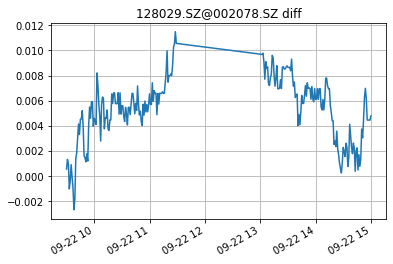

In [24]:
from turtle import title


signal_plot_begin_time = present_date[:4]+'-' + \
                         present_date[4:6]+'-' + \
                         present_date[6:8]+' 09:30:00'
df_signal['diff'].loc[signal_plot_begin_time:].plot(title=cbond_pair[0]+'@'+cbond_pair[1]+' diff',grid=True)

<AxesSubplot:title={'center':'128029.SZ@002078.SZ premium rate'}>

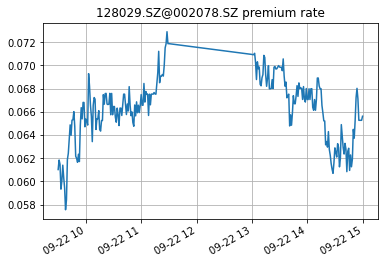

In [25]:
df_tmp = 100/convert_price*df_signal['stock_price']
df_signal['premium rate'] = (df_signal['bond_price'] - df_tmp)/df_tmp
df_signal['premium rate'].loc[signal_plot_begin_time:].plot(title=cbond_pair[0]+'@'+cbond_pair[1]+' premium rate',grid=True)

In [22]:
df_signal

,bond_price,stock_price,bond_rtn,stock_rtn,diff,bond_pos,stock_pos,premium rate
2022-09-21 15:00:00,151.800,11.81,0.000000,0.000000,0.000000,0.0,0.0,0.060415
2022-09-22 09:30:00,150.729,11.72,-0.007055,-0.007621,0.000565,0.0,0.0,0.061019
2022-09-22 09:31:00,150.717,11.71,-0.007134,-0.008467,0.001333,0.0,0.0,0.061841
2022-09-22 09:32:00,150.794,11.72,-0.006627,-0.007621,0.000994,0.0,0.0,0.061477
2022-09-22 09:33:00,150.489,11.72,-0.008636,-0.007621,-0.001016,0.0,0.0,0.059330
2022-09-22 09:34:00,150.332,11.70,-0.009671,-0.009314,-0.000356,0.0,0.0,0.060033
2022-09-22 09:35:00,150.268,11.68,-0.010092,-0.011008,0.000915,0.0,0.0,0.061396
2022-09-22 09:36:00,150.118,11.68,-0.011080,-0.011008,-0.000073,0.0,0.0,0.060337
2022-09-22 09:37:00,149.989,11.68,-0.011930,-0.011008,-0.000923,0.0,0.0,0.059426
2022-09-22 09:38:00,149.852,11.69,-0.012833,-0.010161,-0.002672,0.0,0.0,0.057553


In [23]:
# 到期时间很短，且价内50%的时候，转债近似等价于正股
def cal_premium_rate(bond_price,stock_price,convert_price):
    tmp = 100/convert_price*stock_price
    res = (bond_price - tmp)/tmp
    return res
cal_premium_rate(200,140,70)

0.0